# ***Reparameterization of common distributions***





In [66]:
import torch
from torch.distributions import Beta, Dirichlet
from torch.nn import functional as F

## 1) Beta Distribution

### Generate samples

In [10]:
def beta_sampler(a, b, N):
    beta_dist = Beta(a, b)
    samples = beta_dist.sample((N,))
    return samples # should be N-by-1

### Reparameterize with Kumaraswamy(a,b) approximation

In [60]:
def beta_reparametrize(a,b,N):
    u = torch.rand(N)  # standard normal samples
    samples = (1 - (1 - u) ** (1/b) ) ** (1/a) # reparameterization
    return samples

### Generate 1000 samples from $Beta(a,b)$, where  $a = 1 $, $ b = 0.7$, both directly and using the reparameterization

In [61]:
a = 1
b = 0.7
N = 1000
direct_samples = beta_sampler(a, b, N)
reparametrized_samples = beta_reparametrize(a, b, N)

### Helper function to visualize the generated samples

In [62]:
import matplotlib.pyplot as plt
def compare_samples (samples_1, samples_2, bins=100, range=None):
  fig = plt.figure()
  if range is not None:
    plt.hist(samples_1, bins=bins, range=range)
    plt.hist(samples_2, bins=bins, range=range)
  else:
    plt.hist(samples_1, bins=bins, alpha=0.5)
    plt.hist(samples_2, bins=bins, alpha=0.5)
  plt.xlabel('value')
  plt.ylabel('number of samples')
  plt.legend(['direct','via reparameterization'])
  plt.show()

### Comparison

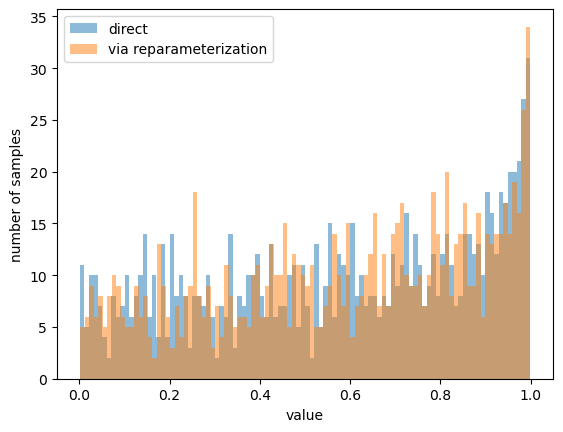

In [63]:
compare_samples (direct_samples, reparametrized_samples)

## 2) Dirichlet Distribution

### Generate N samples from Dirichlet ($\alpha$), where $\alpha = [\alpha_0, \alpha_1, \alpha_2]$

In [69]:
def dirichlet_sampler(alpha, N):
    dirichlet_dist = Dirichlet(alpha)
    samples = dirichlet_dist.sample((N,))
    return samples  # should be N-by-3

### Reparameterization trick for the Dirichlet distribution

In [109]:
# We pproximate it by the Softmax-Gaussian distribution.
def dirichlet_reparametrize(alpha, N):
    # mu
    mu = torch.log(alpha) - torch.mean(torch.log(alpha))
    mu = mu.unsqueeze(0) # to make it (1,K) for broadcasting

    # sigma
    K = len(alpha)
    sigma = torch.sqrt(1/alpha * (1 - 2/K) + 1/K**2 * torch.sum(1/alpha))
    sigma = sigma.unsqueeze(0) # to make it (1,K) for broadcasting
    
    eps =  eps = torch.randn(N,K) # samples from standard normal
    
    samples = torch.exp(mu + sigma * eps) # reparameterization trick on log-normal
    samples = samples / torch.sum(samples, dim=1, keepdim=True) # normalize each sample to lie on simplex
    return samples

### Generate samples for $\alpha= [1, 10, 1]$

In [137]:
alpha = torch.Tensor([1, 10, 1])
N = 100
direct_samples = dirichlet_sampler(alpha, N)
reparametrized_samples = dirichlet_reparametrize(alpha, N)

### Helper function to visualize dirichlet samples

In [138]:
def dirichlet_plotter (samples_1, samples_2, idx):
  fig = plt.figure()

  plt.bar([1,2,3], samples_1[idx,:])
  plt.xlabel('categories')
  plt.ylabel('prob')
  plt.title('direct sampling')
  plt.xticks([1, 2, 3], ['1', '2', '3'])
  fig = plt.figure()
  plt.bar([1,2,3], samples_2[idx,:])
  plt.xlabel('categories')
  plt.ylabel('prob')
  plt.title('via reparametrization')
  plt.xticks([1, 2, 3], ['1', '2', '3'])
  plt.show()

### Comparison

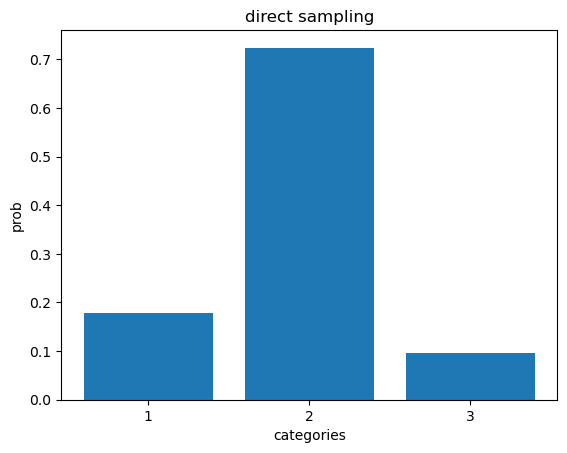

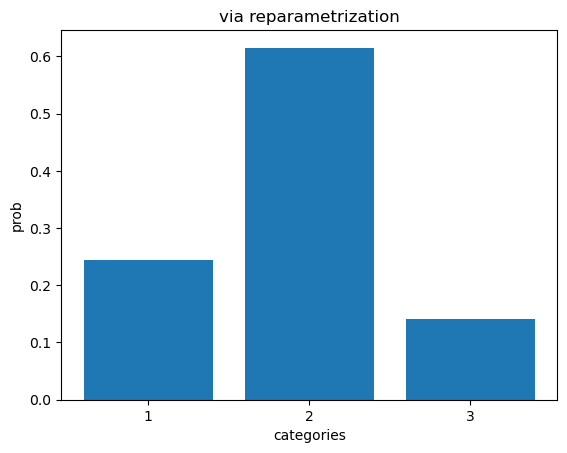

In [143]:
dirichlet_plotter(direct_samples, reparametrized_samples, idx=2) # idx= 0, 1, ..., N

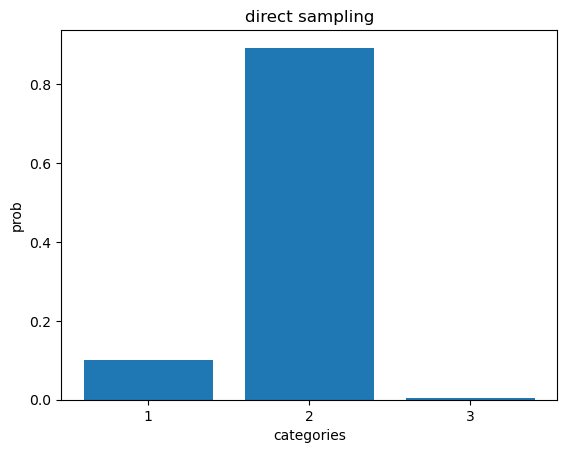

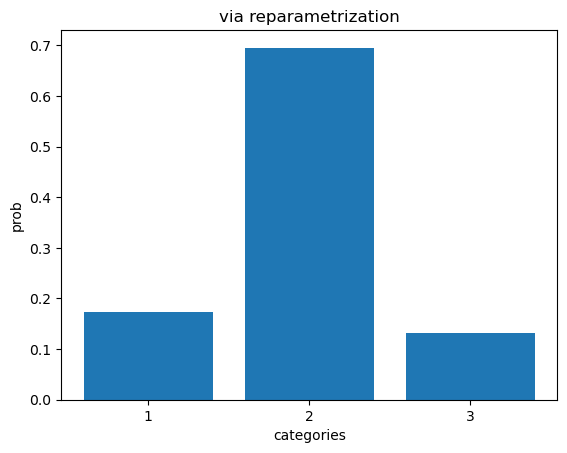

In [144]:
dirichlet_plotter(direct_samples, reparametrized_samples, idx=11) # idx= 0, 1, ..., N

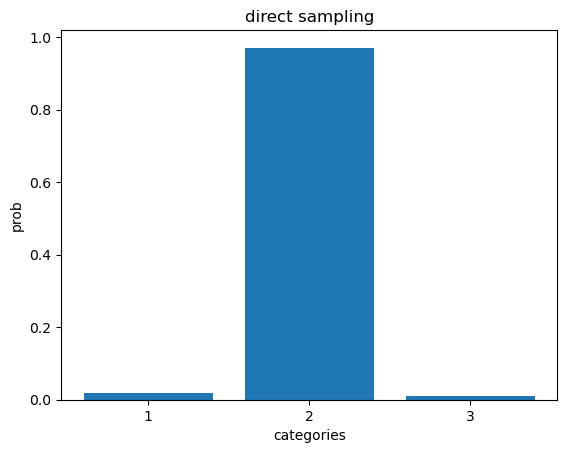

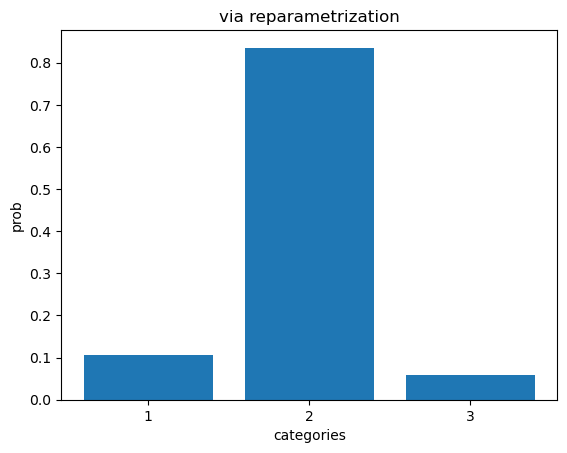

In [146]:
dirichlet_plotter(direct_samples, reparametrized_samples, idx=25) # idx= 0, 1, ..., N

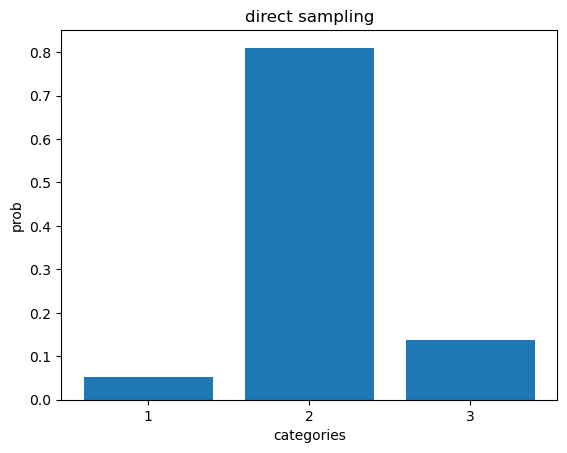

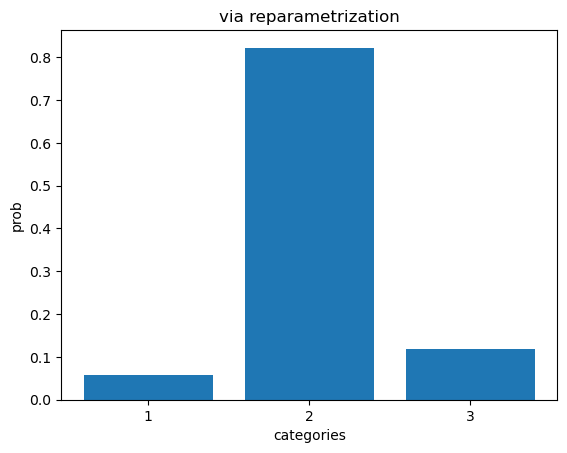

In [148]:
dirichlet_plotter(direct_samples, reparametrized_samples, idx=57) # idx= 0, 1, ..., N